In [62]:
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow

In [63]:
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

## VISUALIZING THE DATA

In [64]:
single_data=x_train[0]
single_data

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [65]:
single_data.shape

(28, 28)

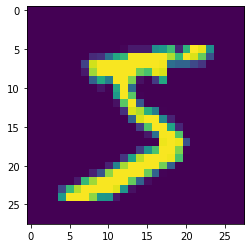

In [66]:
import matplotlib.pyplot as plt
plt.imshow(single_data);

## preprocessing label

In [67]:
y_train.shape

(60000,)

In [68]:
y_test.shape

(10000,)

In [69]:
from tensorflow.keras.utils import to_categorical

In [70]:
y_cat_train=to_categorical(y_train)

In [71]:
y_cat_train.shape

(60000, 10)

In [72]:
y_cat_test=to_categorical(y_test)

In [73]:
y_cat_test.shape

(10000, 10)

## preprocessing X data

In [74]:
x_train.max()

255

In [75]:
x_train.min()

0

In [76]:
x_train=x_train/255

In [77]:
example=x_train[25]
example.max()

1.0

In [78]:
example.min()

0.0

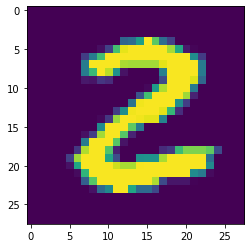

In [79]:
plt.imshow(example)


In [80]:
x_train.shape

(60000, 28, 28)

In [81]:
x_test.shape

(10000, 28, 28)

In [82]:
x_train=x_train.reshape(60000, 28, 28,1)
x_test=x_test.reshape(10000, 28, 28,1)

# model

In [83]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten,Dropout
from tensorflow.keras.callbacks import ReduceLROnPlateau

In [84]:
model = Sequential()

#  set of layer
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(28, 28, 1), activation='relu',))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# FLATTEN IMAGES FROM 28 by 28 to 764 BEFORE FINAL LAYER
model.add(Flatten())

# 128 NEURONS IN DENSE HIDDEN LAYER 
model.add(Dense(128, activation='relu'))

# 10 POSSIBLE CLASSES
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy']) 

In [85]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_19 (Dropout)         (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_14 (Dense)             (None, 128)               589952    
_________________________________________________________________
dense_15 (Dense)             (None, 10)                1290      
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
________________________________________________

In [86]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',patience=2)

# training the model

In [87]:
model.fit(x_train,y_cat_train,epochs=10,validation_data=(x_test,y_cat_test),callbacks=[early_stop])

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1538 - accuracy: 0.9533 - val_loss: 13.9866 - val_accuracy: 0.9717
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0565 - accuracy: 0.9823 - val_loss: 38.1240 - val_accuracy: 0.9343
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0388 - accuracy: 0.9874 - val_loss: 13.8838 - val_accuracy: 0.9797
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0282 - accuracy: 0.9910 - val_loss: 30.7710 - val_accuracy: 0.9638
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0225 - accuracy: 0.9922 - val_loss: 39.5029 - val_accuracy: 0.9566


# evaluate the model

In [88]:
model.metrics_names

['loss', 'accuracy']

In [89]:
history=pd.DataFrame(model.history.history)

In [90]:
history.head()

,loss,accuracy,val_loss,val_accuracy
0,0.153817,0.953283,13.986644,0.9717
1,0.056525,0.982300,38.124004,0.9343
2,0.038763,0.987400,13.883762,0.9797
3,0.028240,0.990983,30.771040,0.9638
4,0.022517,0.992200,39.502880,0.9566


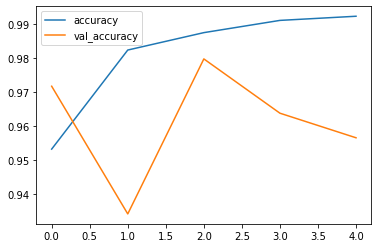

In [91]:
history[['accuracy','val_accuracy']].plot()

In [92]:
test_result=model.evaluate(x_test,y_cat_test)

313/313 [==============================] - 1s 4ms/step - loss: 39.5029 - accuracy: 0.9566


In [93]:
model.metrics_names

['loss', 'accuracy']

In [94]:
pd.DataFrame(test_result,index=model.metrics_names,columns=['testdata metrics'])

,testdata metrics
loss,39.50288
accuracy,0.95660


In [95]:
from sklearn.metrics import classification_report,confusion_matrix


In [96]:
predictions = model.predict_classes(x_test)

In [97]:
result=pd.DataFrame(y_test,predictions)
result.columns=['Predictions']
result.head()

,Predictions
7,7
2,2
1,1
0,0
4,4


In [98]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       1.00      0.93      0.96      1135
           2       0.98      0.97      0.98      1032
           3       0.96      0.99      0.97      1010
           4       0.97      0.98      0.97       982
           5       1.00      0.91      0.95       892
           6       0.98      0.98      0.98       958
           7       0.99      0.90      0.95      1028
           8       0.77      1.00      0.87       974
           9       0.99      0.92      0.96      1009

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000



[[ 972    0    1    1    0    0    2    0    4    0]
 [   0 1050    2    3    1    0    2    0   76    1]
 [   2    0 1003    1    1    0    4    4   17    0]
 [   0    0    4  995    0    0    0    0   11    0]
 [   0    0    0    0  963    0    6    0   10    3]
 [   3    0    0   19    0  812    7    0   51    0]
 [   3    1    0    0    1    0  943    0   10    0]
 [   1    1   13    7   16    0    0  927   60    3]
 [   1    0    0    0    0    0    0    1  972    0]
 [   2    0    0    8   14    0    0    0   56  929]]


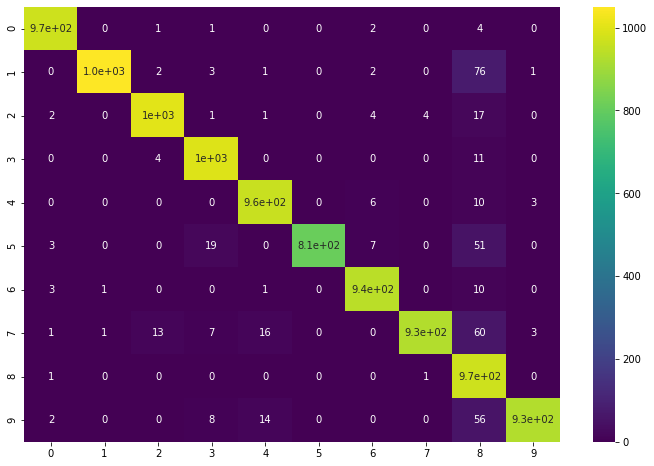

In [99]:
print(confusion_matrix(y_test,predictions))
plt.figure(figsize=(12,8))
sns.heatmap(confusion_matrix(y_test,predictions),annot=True,cmap='viridis')

*looks like model is performing quite well, lets see how it forms with various optimizer and fine tuning*

## ***Various type of optimizer***

In [100]:
def build_model():
  model = Sequential()

  model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', activation ='relu', input_shape = (28,28,1)))
  model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu'))
  model.add(MaxPool2D(pool_size=(2,2)))
  model.add(Dropout(0.25))
   
  model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))
  model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))
  model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
  model.add(Dropout(0.25))


  model.add(Flatten())
  model.add(Dense(256, activation = "relu"))
  model.add(Dropout(0.5))
  model.add(Dense(10, activation = "softmax"))
  return model


In [101]:
model=build_model()
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_26 (Conv2D)           (None, 28, 28, 32)        832       
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 28, 28, 32)        25632     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_20 (Dropout)         (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 7, 7, 64)         

ADAM OPTIMIZER

In [102]:
model=build_model()
optimizer=tensorflow.keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-8, decay=1e-5, amsgrad=False)
early_stopping = EarlyStopping(monitor='val_loss', mode='min', patience=5, restore_best_weights=True, verbose=1)
red_lr = tensorflow.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', mode='min', patience=3, factor=0.5, min_lr=1e-6, verbose=1)
model.compile(loss='categorical_crossentropy',optimizer=optimizer,metrics=['accuracy'])

In [103]:
history_adam=model.fit(x_train,y_cat_train,epochs=75,batch_size=256,validation_split=0.2,callbacks=[early_stopping,red_lr]).history

Epoch 1/75
188/188 [==============================] - 7s 37ms/step - loss: 0.3405 - accuracy: 0.8894 - val_loss: 0.0686 - val_accuracy: 0.9793 - lr: 0.0010
Epoch 2/75
188/188 [==============================] - 7s 36ms/step - loss: 0.0864 - accuracy: 0.9738 - val_loss: 0.0452 - val_accuracy: 0.9872 - lr: 0.0010
Epoch 3/75
188/188 [==============================] - 7s 36ms/step - loss: 0.0644 - accuracy: 0.9807 - val_loss: 0.0349 - val_accuracy: 0.9903 - lr: 0.0010
Epoch 4/75
188/188 [==============================] - 7s 35ms/step - loss: 0.0501 - accuracy: 0.9842 - val_loss: 0.0319 - val_accuracy: 0.9909 - lr: 0.0010
Epoch 5/75
188/188 [==============================] - 7s 35ms/step - loss: 0.0434 - accuracy: 0.9871 - val_loss: 0.0295 - val_accuracy: 0.9917 - lr: 0.0010
Epoch 6/75
188/188 [==============================] - 7s 35ms/step - loss: 0.0373 - accuracy: 0.9882 - val_loss: 0.0267 - val_accuracy: 0.9917 - lr: 0.0010
Epoch 7/75
188/188 [==============================] - 7s 35ms/st

In [104]:
print("accuracy on test set with Adam Optimizer is {} %".format(model.evaluate(x_test, y_cat_test, verbose=0)[1]*100))

accuracy on test set with Adam Optimizer is 99.40000176429749 %


RMS Prop Optimizer

In [105]:
model=build_model()
optimizer=tensorflow.keras.optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=1e-5)
early_stopping = EarlyStopping(monitor='val_loss', mode='min', patience=5, restore_best_weights=True, verbose=1)
red_lr = tensorflow.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', mode='min', patience=3, factor=0.5, min_lr=1e-6, verbose=1)
model.compile(loss='categorical_crossentropy',optimizer=optimizer,metrics=['accuracy'])
history_RMSprop=model.fit(x_train,y_cat_train,epochs=75,batch_size=256,validation_split=0.2,callbacks=[early_stopping,red_lr]).history

Epoch 1/75
188/188 [==============================] - 7s 39ms/step - loss: 0.3225 - accuracy: 0.8983 - val_loss: 0.0648 - val_accuracy: 0.9797 - lr: 0.0010
Epoch 2/75
188/188 [==============================] - 7s 36ms/step - loss: 0.0821 - accuracy: 0.9751 - val_loss: 0.0498 - val_accuracy: 0.9856 - lr: 0.0010
Epoch 3/75
188/188 [==============================] - 7s 36ms/step - loss: 0.0564 - accuracy: 0.9825 - val_loss: 0.0335 - val_accuracy: 0.9894 - lr: 0.0010
Epoch 4/75
188/188 [==============================] - 7s 37ms/step - loss: 0.0459 - accuracy: 0.9861 - val_loss: 0.0329 - val_accuracy: 0.9912 - lr: 0.0010
Epoch 5/75
188/188 [==============================] - 7s 36ms/step - loss: 0.0377 - accuracy: 0.9885 - val_loss: 0.0294 - val_accuracy: 0.9913 - lr: 0.0010
Epoch 6/75
188/188 [==============================] - 7s 36ms/step - loss: 0.0341 - accuracy: 0.9891 - val_loss: 0.0259 - val_accuracy: 0.9931 - lr: 0.0010
Epoch 7/75
188/188 [==============================] - 7s 37ms/st

In [106]:
print("accuracy on test set with RMS prop Optimizer is {} %".format(model.evaluate(x_test, y_cat_test, verbose=0)[1]*100))

accuracy on test set with RMS prop Optimizer is 99.48999881744385 %


SGD with Momentum

In [107]:
model=build_model()
optimizer=tensorflow.keras.optimizers.SGD(lr=0.01, momentum=0.9, decay=1e-5)
early_stopping = EarlyStopping(monitor='val_loss', mode='min', patience=5, restore_best_weights=True, verbose=1)
red_lr = tensorflow.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', mode='min', patience=3, factor=0.5, min_lr=1e-6, verbose=1)
model.compile(loss='categorical_crossentropy',optimizer=optimizer,metrics=['accuracy'])
history_SGDmomentum=model.fit(x_train,y_cat_train,epochs=75,batch_size=256,validation_split=0.2,callbacks=[early_stopping,red_lr]).history

Epoch 1/75
188/188 [==============================] - 7s 36ms/step - loss: 0.8754 - accuracy: 0.6989 - val_loss: 0.1362 - val_accuracy: 0.9595 - lr: 0.0100
Epoch 2/75
188/188 [==============================] - 7s 35ms/step - loss: 0.1878 - accuracy: 0.9432 - val_loss: 0.0817 - val_accuracy: 0.9767 - lr: 0.0100
Epoch 3/75
188/188 [==============================] - 7s 35ms/step - loss: 0.1320 - accuracy: 0.9600 - val_loss: 0.0652 - val_accuracy: 0.9800 - lr: 0.0100
Epoch 4/75
188/188 [==============================] - 7s 35ms/step - loss: 0.1077 - accuracy: 0.9662 - val_loss: 0.0554 - val_accuracy: 0.9828 - lr: 0.0100
Epoch 5/75
188/188 [==============================] - 7s 35ms/step - loss: 0.0917 - accuracy: 0.9721 - val_loss: 0.0505 - val_accuracy: 0.9852 - lr: 0.0100
Epoch 6/75
188/188 [==============================] - 7s 35ms/step - loss: 0.0813 - accuracy: 0.9747 - val_loss: 0.0462 - val_accuracy: 0.9864 - lr: 0.0100
Epoch 7/75
188/188 [==============================] - 7s 35ms/st

In [108]:
print("accuracy on test set with SGD momentum Optimizer is {} %".format(model.evaluate(x_test, y_cat_test, verbose=0)[1]*100))

accuracy on test set with SGD momentum Optimizer is 99.22999739646912 %


ADAGrad Optimizer

In [109]:
model=build_model()
optimizer=tensorflow.keras.optimizers.Adagrad(lr=0.01, epsilon=None, decay=1e-5)
early_stopping = EarlyStopping(monitor='val_loss', mode='min', patience=5, restore_best_weights=True, verbose=1)
red_lr = tensorflow.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', mode='min', patience=3, factor=0.5, min_lr=1e-6, verbose=1)
model.compile(loss='categorical_crossentropy',optimizer=optimizer,metrics=['accuracy'])
history_ADAgrad=model.fit(x_train,y_cat_train,epochs=75,batch_size=256,validation_split=0.2,callbacks=[early_stopping,red_lr]).history

Epoch 1/75
188/188 [==============================] - 7s 37ms/step - loss: 1.3409 - accuracy: 0.5368 - val_loss: 0.3062 - val_accuracy: 0.9132 - lr: 0.0100
Epoch 2/75
188/188 [==============================] - 7s 36ms/step - loss: 0.3808 - accuracy: 0.8815 - val_loss: 0.1585 - val_accuracy: 0.9548 - lr: 0.0100
Epoch 3/75
188/188 [==============================] - 7s 35ms/step - loss: 0.2455 - accuracy: 0.9230 - val_loss: 0.1143 - val_accuracy: 0.9657 - lr: 0.0100
Epoch 4/75
188/188 [==============================] - 7s 35ms/step - loss: 0.1945 - accuracy: 0.9400 - val_loss: 0.0929 - val_accuracy: 0.9714 - lr: 0.0100
Epoch 5/75
188/188 [==============================] - 7s 35ms/step - loss: 0.1618 - accuracy: 0.9501 - val_loss: 0.0842 - val_accuracy: 0.9744 - lr: 0.0100
Epoch 6/75
188/188 [==============================] - 7s 35ms/step - loss: 0.1448 - accuracy: 0.9556 - val_loss: 0.0725 - val_accuracy: 0.9775 - lr: 0.0100
Epoch 7/75
188/188 [==============================] - 7s 35ms/st

In [110]:
print("accuracy on test set with ADA Grad optimizer is {} %".format(model.evaluate(x_test, y_cat_test, verbose=0)[1]*100))

accuracy on test set with ADA Grad optimizer is 99.1599977016449 %


Visulazing Performance of Various Optimizer

Text(0.5, 1.0, 'Validation Loss of different optimizers v/s Epochs')

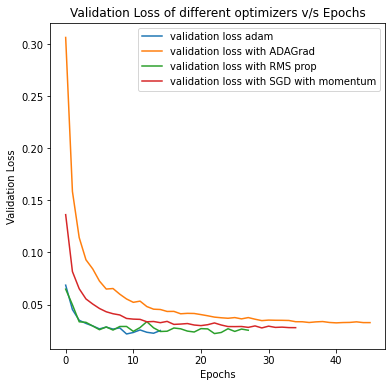

In [111]:
plt.figure(figsize=(6,6))
plt.plot(history_adam["val_loss"],label="validation loss adam")
plt.plot(history_ADAgrad["val_loss"],label="validation loss with ADAGrad")
plt.plot(history_RMSprop["val_loss"],label="validation loss with RMS prop")
plt.plot(history_SGDmomentum["val_loss"],label="validation loss with SGD with momentum")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Validation Loss")
plt.title("Validation Loss of different optimizers v/s Epochs")

# **FINE TUNING WITH ADAM OPTIMIZER**

In [112]:
model=build_model()
optimizer=tensorflow.keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-8, decay=1e-5, amsgrad=False)
early_stopping = EarlyStopping(monitor='val_loss', mode='min', patience=5, restore_best_weights=True, verbose=1)
red_lr = tensorflow.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', mode='min', patience=3, factor=0.5, min_lr=1e-6, verbose=1)
model.compile(loss='categorical_crossentropy',optimizer=optimizer,metrics=['accuracy'])

In [113]:
history_adam_1=model.fit(x_train,y_cat_train,epochs=75,batch_size=128,validation_split=0.2,callbacks=[early_stopping,red_lr]).history

Epoch 1/75
375/375 [==============================] - 8s 22ms/step - loss: 0.2560 - accuracy: 0.9175 - val_loss: 0.0571 - val_accuracy: 0.9829 - lr: 0.0010
Epoch 2/75
375/375 [==============================] - 8s 21ms/step - loss: 0.0759 - accuracy: 0.9769 - val_loss: 0.0429 - val_accuracy: 0.9868 - lr: 0.0010
Epoch 3/75
375/375 [==============================] - 8s 21ms/step - loss: 0.0572 - accuracy: 0.9828 - val_loss: 0.0393 - val_accuracy: 0.9896 - lr: 0.0010
Epoch 4/75
375/375 [==============================] - 8s 20ms/step - loss: 0.0462 - accuracy: 0.9859 - val_loss: 0.0296 - val_accuracy: 0.9918 - lr: 0.0010
Epoch 5/75
375/375 [==============================] - 8s 21ms/step - loss: 0.0388 - accuracy: 0.9877 - val_loss: 0.0323 - val_accuracy: 0.9913 - lr: 0.0010
Epoch 6/75
375/375 [==============================] - 8s 20ms/step - loss: 0.0343 - accuracy: 0.9895 - val_loss: 0.0319 - val_accuracy: 0.9909 - lr: 0.0010
Epoch 7/75
373/375 [============================>.] - ETA: 0s - 

In [114]:
print("accuracy on test set with Adam Optimizer after fine tuning is {} %".format(model.evaluate(x_test, y_cat_test, verbose=0)[1]*100))

accuracy on test set with Adam Optimizer after fine tuning is 99.50000047683716 %


Text(0.5, 1.0, 'Loss v/s Epochs')

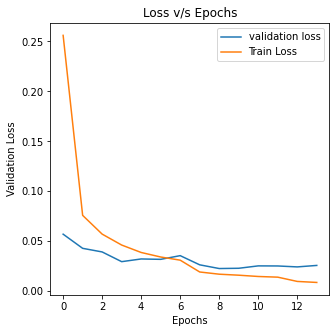

In [115]:
plt.figure(figsize=(5,5))
plt.plot(history_adam_1["val_loss"],label="validation loss")
plt.plot(history_adam_1["loss"],label="Train Loss")

plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Validation Loss")
plt.title("Loss v/s Epochs")

Text(0.5, 1.0, 'Loss v/s Epochs')

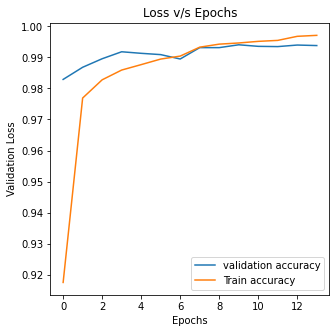

In [116]:
plt.figure(figsize=(5,5))
plt.plot(history_adam_1["val_accuracy"],label="validation accuracy")
plt.plot(history_adam_1["accuracy"],label="Train accuracy")

plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Validation Loss")
plt.title("Loss v/s Epochs") 

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       980
           1       1.00      1.00      1.00      1135
           2       0.99      1.00      0.99      1032
           3       0.99      1.00      1.00      1010
           4       0.99      1.00      0.99       982
           5       1.00      0.99      0.99       892
           6       1.00      0.99      0.99       958
           7       0.99      1.00      0.99      1028
           8       1.00      0.99      1.00       974
           9       1.00      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       1.00      0.99      0.99     10000
weighted avg       1.00      0.99      0.99     10000

[[ 979    0    0    0    0    0    0    1    0    0]
 [   0 1133    1    1    0    0    0    0    0    0]
 [   2    0 1027    0    1    0    0    2    0    0]
 [   0    0    0 1008    0    2    0    0    0    0]
 [   0    0    0    0  978   

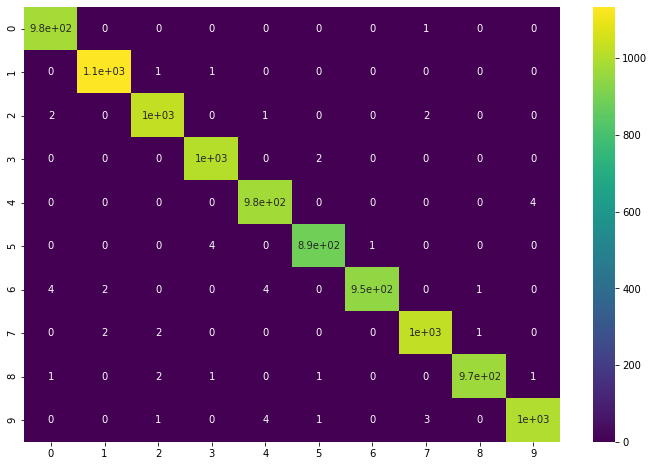

In [117]:
predictions=model.predict_classes(x_test)
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))
plt.figure(figsize=(12,8))
sns.heatmap(confusion_matrix(y_test,predictions),annot=True,cmap='viridis')


## predicting on a single test image

In [118]:
single_image_x=x_train[5]

In [119]:
single_image_x.shape

(28, 28, 1)

In [120]:
model.predict_classes(single_image_x.reshape(1,28,28,1))

array([2])

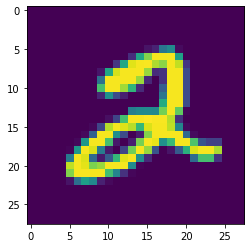

In [121]:
plt.imshow(single_image_x.reshape(28,28))

In [122]:
## looks like modelis performing quite well. For more accuracy I have to use Image Generator to get more train data and pervent overfiting. 
#As I got more than 99.5 percent accuracy on Test data so data augmentaion may be avoided.
